In [1]:
##Station
file="TX_STAID000737.txt"

##AR model
p=1
method_="monthlyLL"                 # "mean", "median", "concat", "sumLL", "monthlyLL"
periodicity_model="autotrigo"       # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period=0                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype="LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam=nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model="autotrigo"     # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period=0                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype="LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam=nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n=100

100

In [2]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")
include("../utils/Missing_values.jl")
include("../utils/Structure.jl")
include("../utils/Plotting.jl")

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

Sample_diagnostic (generic function with 2 methods)

In [3]:
series=extract_series(file,plot=false)
series=truncate_MV(series)
years=unique(Dates.year.(series.DATE))

Caracteristics_Series = init_CaracteristicsSeries(series)

CaracteristicsSeries([5.60864197530864, 6.0851851851851855, 5.533333333333336, 5.366666666666668, 5.716049382716051, 5.77283950617284, 5.401234567901235, 5.356790123456789, 5.698765432098765, 5.741975308641975  …  6.827160493827159, 6.672839506172841, 6.477777777777779, 6.506172839506172, 6.359259259259259, 5.904938271604939, 5.898765432098763, 5.862962962962962, 5.881481481481482, 5.590123456790123], [14.3, 13.9, 13.1, 13.4, 13.4, 14.7, 13.5, 13.4, 14.5, 13.2  …  14.1, 14.2, 13.2, 14.4, 13.8, 13.1, 14.2, 14.2, 16.0, 16.1], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       5.72561      4.27158         15.2
   2 │     2       6.92369      4.30074         19.0
   3 │     3      10.4113       4.13513         24.8
   4 │     4      13.9756       4.33257         27.9
   5 │     5      17.7996       4.37329         31.7
   6 │     6      20.7504   

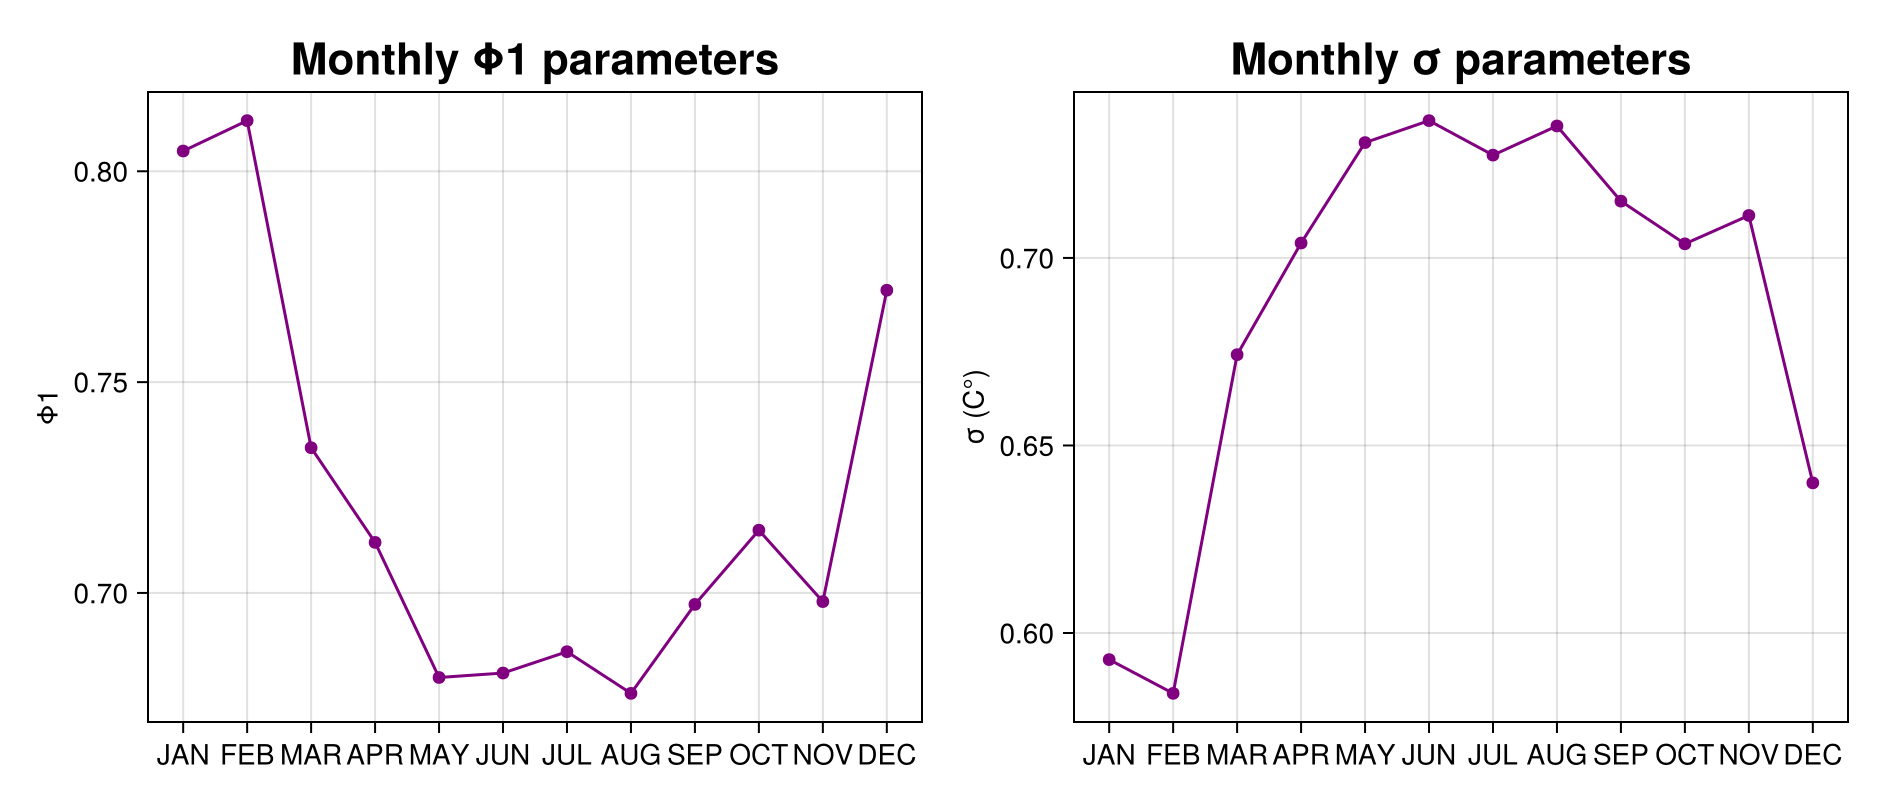

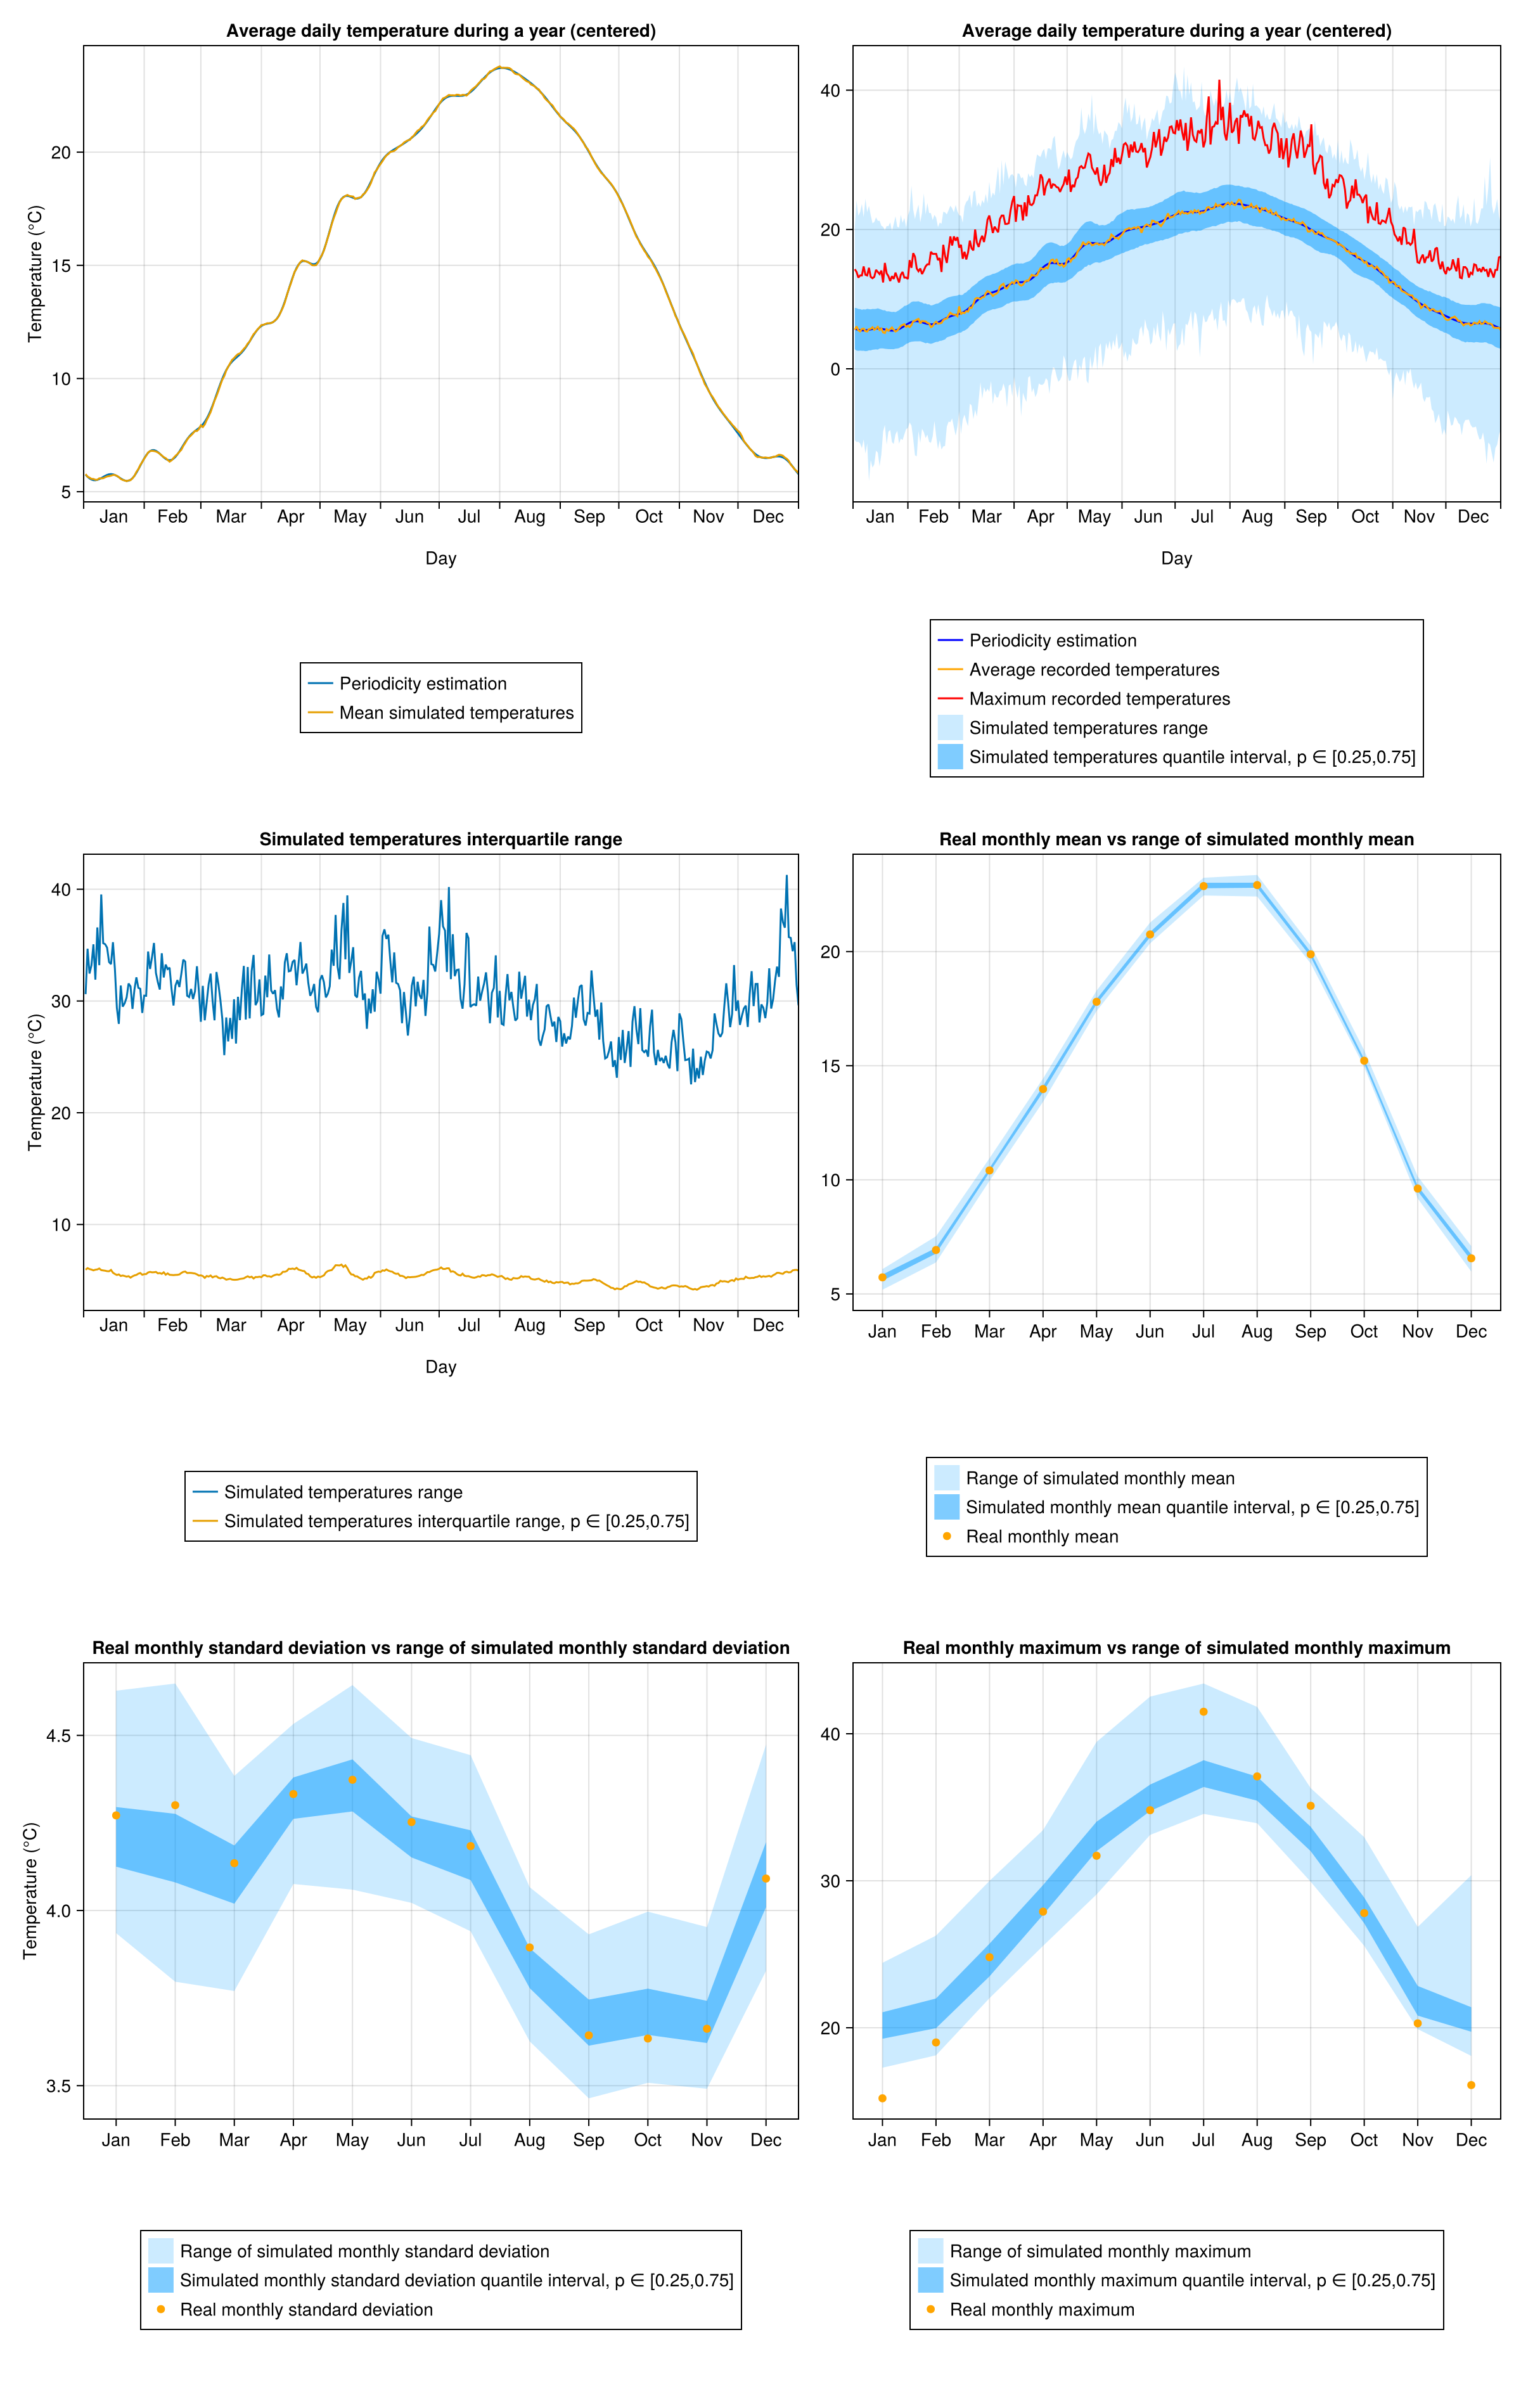

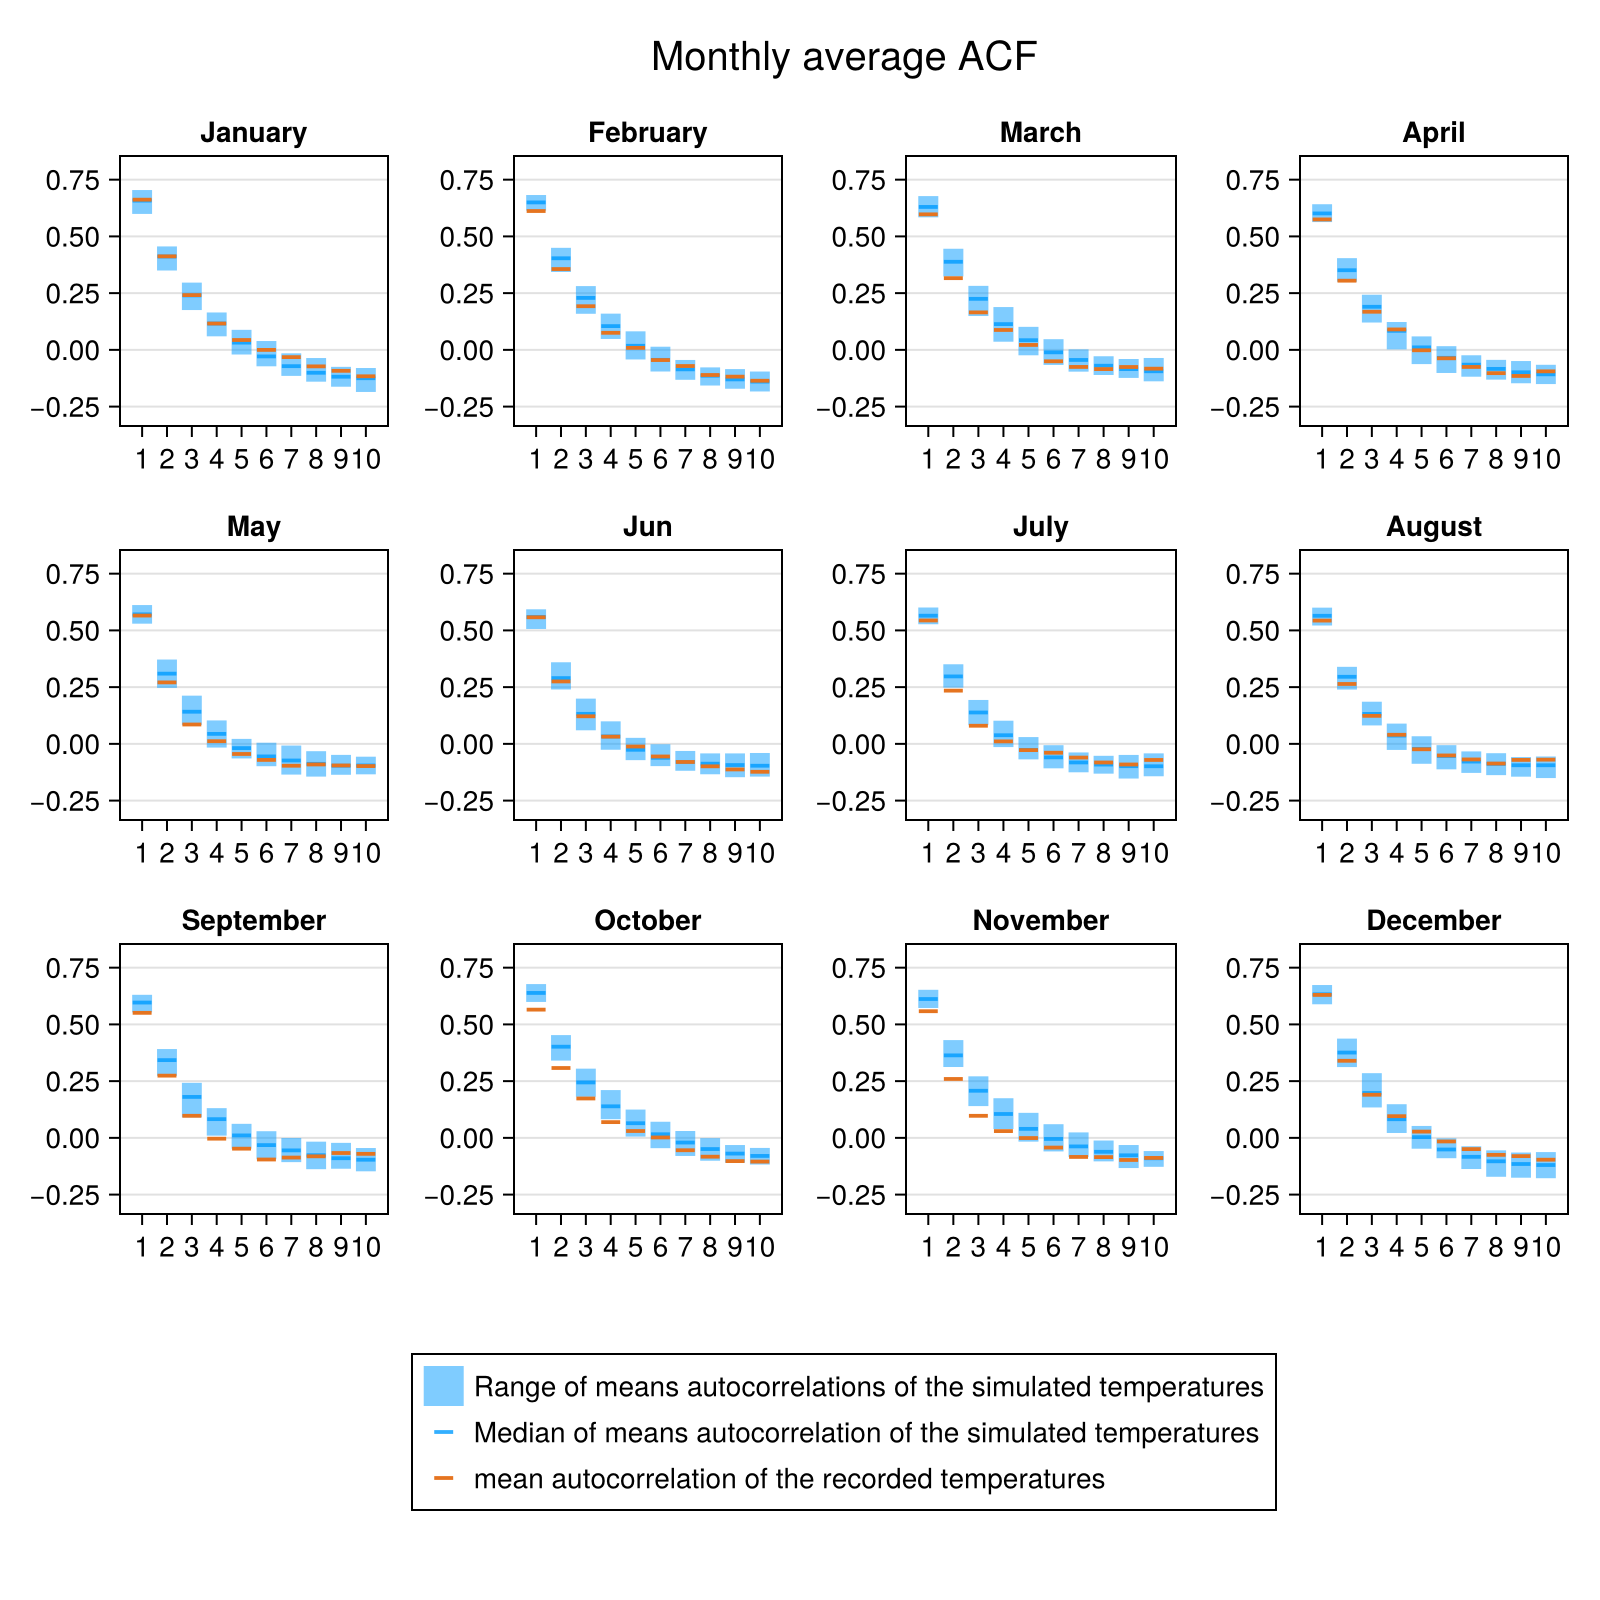

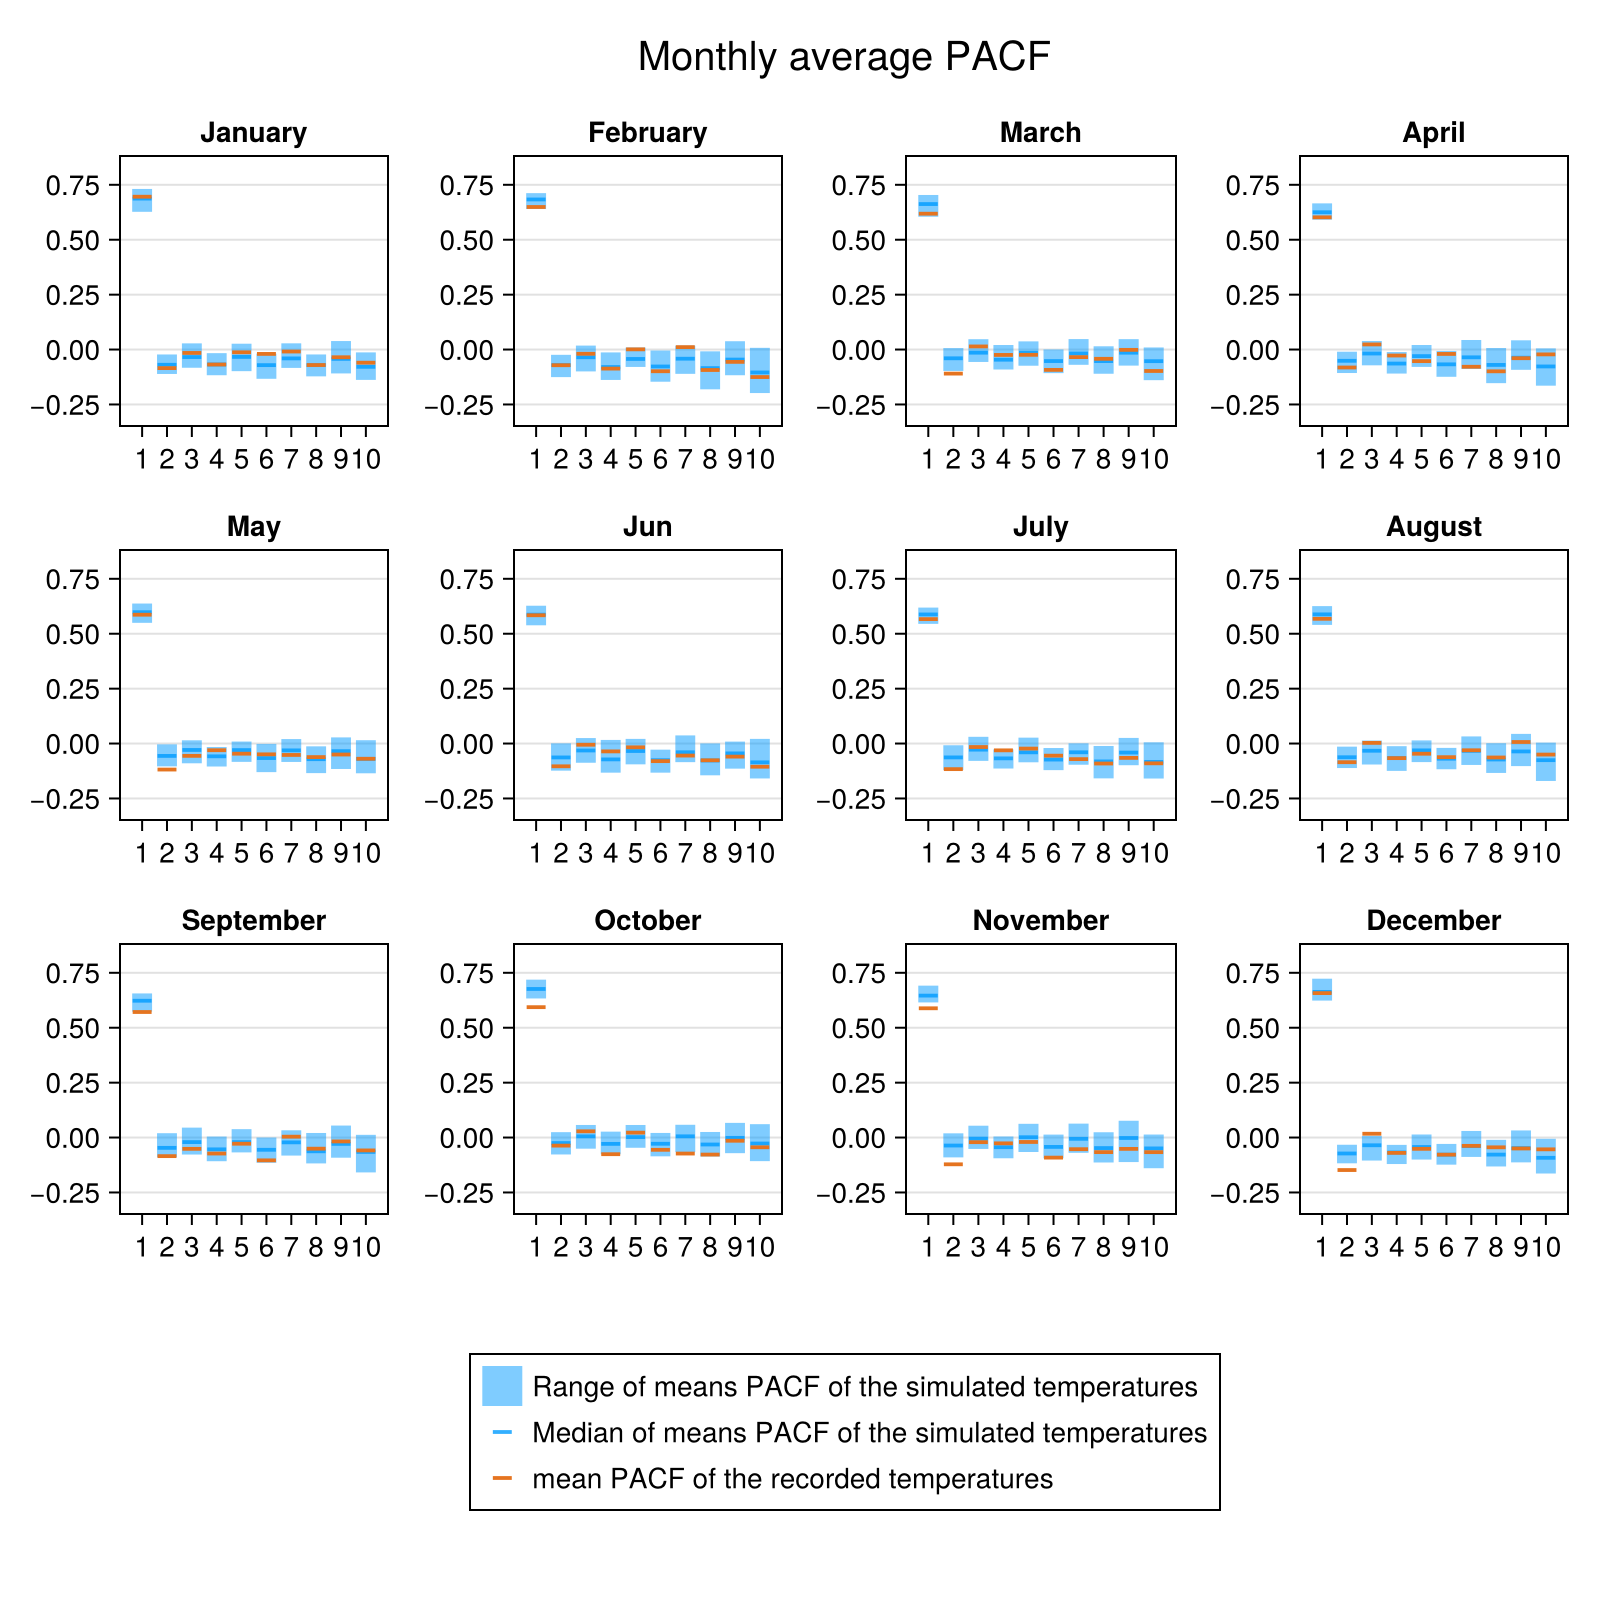

Additive periodicity order : 20
Multiplicative periodicity order : 19


In [4]:
Model = fit_AR(series[:, 2], series.DATE,
    p=p,
    method_=method_,
    periodicity_model=periodicity_model,
    degree_period=degree_period,
    Trendtype=Trendtype,
    trendparam=trendparam,
    σ_periodicity_model=σ_periodicity_model,
    σ_degree_period=σ_degree_period,
    σ_Trendtype=σ_Trendtype,
    σ_trendparam=σ_trendparam)

sample_ = rand(Model, n, series.DATE)
display.(Sample_diagnostic(sample_, Caracteristics_Series, Model))
println("Additive periodicity order : $(Model.period_order)")
println("Multiplicative periodicity order : $(Model.σ_period_order)")